In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import *
from keras.layers import *
from keras.applications import vgg16
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image

In [24]:
translator = load_model("E:\Software\VS Code\Programs\Personal\ASL translator\Model\\trainedasl.h5")
classes=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','del','nothing','space']
s=""
def predictclass(imgarr):
    #imgarr[0]=imgarr[0]/255
    predict_x = translator.predict(imgarr)
    print(predict_x)
    predicted = int(np.argmax(predict_x,axis=1))
    print(classes[predicted])
    return(classes[predicted])

In [25]:
img1=image.load_img("E:\Software\VS Code\Programs\Personal\ASL translator\splitdata\\train\c\c80.jpg",target_size=(128,128))
#imgr=cv2.flip(img1,1)
img=image.img_to_array(img1)
img=img/255

In [26]:
imga=np.expand_dims(img,axis=0)

In [27]:
imga.shape

(1, 128, 128, 3)

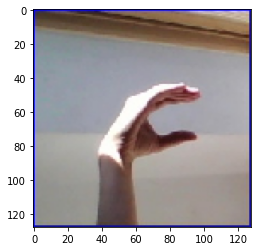

In [28]:
plt.imshow(imga[0])

In [29]:
newch = predictclass(imga)

1/1 [==============================] - 0s 187ms/step
[[1.6486943e-08 7.0519798e-07 9.9994385e-01 2.3590435e-06 1.5824433e-08
  7.8620724e-07 1.6538500e-08 3.1676116e-08 2.0974481e-12 2.7586598e-11
  9.9590357e-11 9.6041015e-09 1.5476635e-10 7.1779360e-10 1.9411809e-08
  4.4561366e-05 6.2008121e-06 1.6715043e-12 6.2719385e-11 2.8809310e-09
  2.3975735e-12 8.1040930e-13 4.1136143e-11 1.3671961e-12 7.8101371e-12
  1.8125158e-08 2.2060904e-09 1.3859125e-06 7.3881529e-10]]
c


In [30]:
s+=newch

### NLP

In [32]:
from math import log

# Build a cost dictionary, assuming Zipf's law and cost = -math.log(probability).
words = open("E:\Software\VS Code\Programs\Personal\ASL translator\words-by-frequency.txt").read().split()
wordcost = dict((k, log((i+1)*log(len(words)))) for i,k in enumerate(words))
maxword = max(len(x) for x in words)

def infer_spaces(s):
    """Uses dynamic programming to infer the location of spaces in a string
    without spaces."""

    # Find the best match for the i first characters, assuming cost has
    # been built for the i-1 first characters.
    # Returns a pair (match_cost, match_length).
    def best_match(i):
        candidates = enumerate(reversed(cost[max(0, i-maxword):i]))
        return min((c + wordcost.get(s[i-k-1:i], 9e999), k+1) for k,c in candidates)

    # Build the cost array.
    cost = [0]
    for i in range(1,len(s)+1):
        c,k = best_match(i)
        cost.append(c)

    # Backtrack to recover the minimal-cost string.
    out = []
    i = len(s)
    while i>0:
        c,k = best_match(i)
        assert c == cost[i]
        out.append(s[i-k:i])
        i -= k

    return " ".join(reversed(out))

In [33]:
text = s.lower()
#text="thisisatest"
text = infer_spaces(text)
print(text)

this is a test


### Text to Speech

In [34]:
# to speech conversion
from gtts import gTTS

# os is imported so that we can play the converted audio
import os

ASLtext = text

# We are converting the text into three Languages
language = 'en'
language1 = 'fr'
language2 = 'es'

# Passing the text and language to the engine, here we have marked slow=Ture. Which tells
# the module that the converted audio should have a slow speed
speech1 = gTTS(text=ASLtext, lang=language, slow=True)
speech2 = gTTS(text=ASLtext, lang=language1, slow=True)
speech3 = gTTS(text=ASLtext, lang=language2, slow=True)
# Saving the converted audio in a mp3 file named ASLtoTTS
speech1.save("E:\Software\VS Code\Programs\Personal\ASL translator\TTS\ASLtoTTS.mp3")
speech2.save("E:\Software\VS Code\Programs\Personal\ASL translator\TTS\ASLtoTTSfr.mp3")
speech3.save("E:\Software\VS Code\Programs\Personal\ASL translator\TTS\ASLtoTTSes.mp3")